Recording for 10 seconds...
Recording completed! Audio saved as: recorded_audio.wav
Applying noise suppression...
Noise suppression complete. Saved to: denoised_audio.wav
Plotting waveforms...


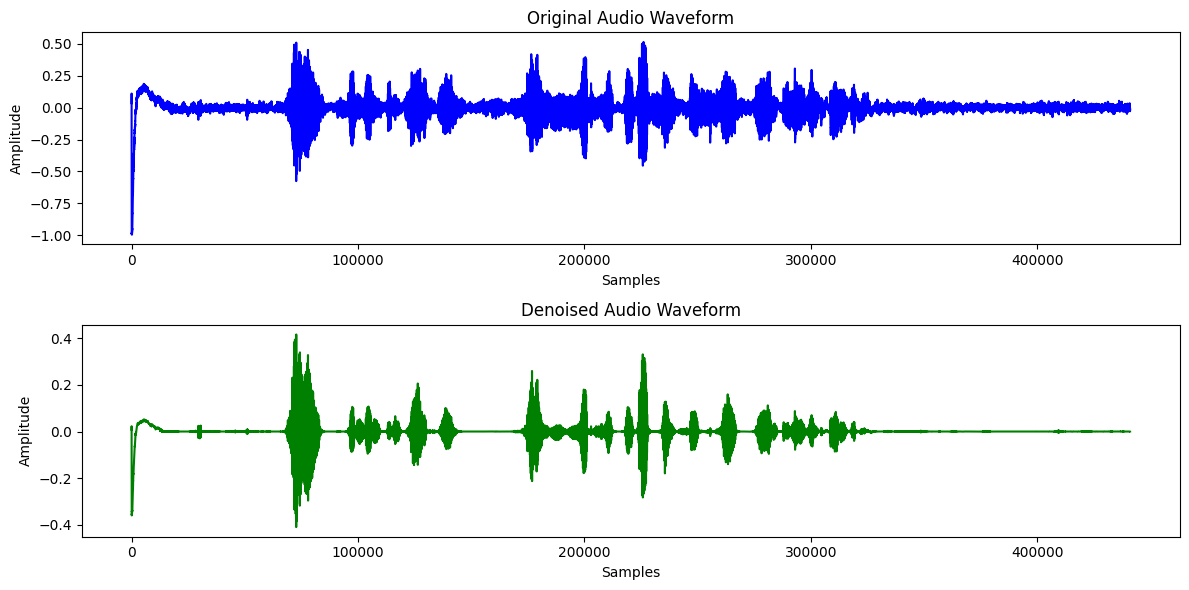

Playing denoised audio...
Playing audio...
Transcribing audio...
Transcribed Text: Hello, this is Ismail here. I am happy that my friend got placed in a good company.
Predicted Sentiment: Happy 😄
Goodbye!


In [8]:
import os
from pydub import AudioSegment
from pydub.playback import play
import noisereduce as nr
import whisper
import librosa
import soundfile as sf
import sounddevice as sd
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

# Load the Whisper model for transcription
speech_model = whisper.load_model("base")


# Record audio with improved recording logic
def record_audio(duration=10, output_file="recorded_audio.wav"):
    """Record audio from the system's microphone."""
    print(f"Recording for {duration} seconds...")
    fs = 44100  # Sampling rate
    recording = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype="float32")
    sd.wait()
    write(output_file, fs, (recording * 32767).astype("int16"))
    print("Recording completed! Audio saved as:", output_file)
    return output_file


# Apply advanced noise suppression
def apply_noise_suppression(input_file, output_file):
    """Apply advanced noise suppression to recorded audio."""
    print("Applying noise suppression...")
    audio, sr = librosa.load(input_file, sr=None)  # Load audio with original sampling rate
    reduced_noise = nr.reduce_noise(y=audio, sr=sr)
    sf.write(output_file, reduced_noise, sr)
    print("Noise suppression complete. Saved to:", output_file)
    return output_file, audio, reduced_noise, sr


# Plot audio waveform
def plot_audio_waveform(original_audio, denoised_audio, sr):
    """Plot waveforms for the original and denoised audio."""
    plt.figure(figsize=(12, 6))

    # Plot original audio
    plt.subplot(2, 1, 1)
    plt.plot(original_audio, color='blue')
    plt.title("Original Audio Waveform")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")

    # Plot denoised audio
    plt.subplot(2, 1, 2)
    plt.plot(denoised_audio, color='green')
    plt.title("Denoised Audio Waveform")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()


# Perform transcription using Whisper model
def transcribe_audio(audio_file):
    """Transcribe audio using the Whisper model."""
    try:
        print("Transcribing audio...")
        result = speech_model.transcribe(audio_file)
        transcription = result.get("text", "").strip()
        if not transcription:
            return "Could not transcribe audio."
        return transcription
    except Exception as e:
        print(f"Error during transcription: {e}")
        return "Could not transcribe audio."


# Simple sentiment analysis logic without external APIs
def analyze_sentiment(text):
    """
    Analyze sentiment heuristically based on keywords for improved accuracy.
    Categorizes sentences into Happy, Sad, or Neutral.
    """
    happy_words = {"happy", "joy", "delighted", "pleased", "great", "fantastic", "good"}
    sad_words = {"sad", "depressed", "angry", "unhappy", "bad", "miserable", "pain"}

    text_words = set(text.lower().split())

    # Sentiment logic
    if text_words & happy_words:
        return "Happy 😄"
    elif text_words & sad_words:
        return "Sad 😞"
    else:
        return "Neutral 😐"


# Function to play back audio
def play_audio(file_path):
    """Play audio."""
    try:
        print("Playing audio...")
        play(AudioSegment.from_wav(file_path))
    except Exception as e:
        print(f"Error playing audio: {e}")


# Main Driver Code
def main():
    # Record the audio
    recorded_file = record_audio()
    
    # Noise suppression
    denoised_file, original_audio, denoised_audio, sr = apply_noise_suppression(recorded_file, "denoised_audio.wav")
    
    # Plot waveforms
    print("Plotting waveforms...")
    plot_audio_waveform(original_audio, denoised_audio, sr)

    # Auto-play denoised audio
    print("Playing denoised audio...")
    play_audio(denoised_file)
    
    # Transcribe audio using Whisper
    transcribed_text = transcribe_audio(denoised_file)
    print(f"Transcribed Text: {transcribed_text}")
    
    # Analyze sentiment using heuristic logic
    sentiment_result = analyze_sentiment(transcribed_text)
    print(f"Predicted Sentiment: {sentiment_result}")

    # Playback loop
    while True:
        user_input = input("\nPress 'p' to replay the denoised audio, 'q' to quit: ").strip().lower()
        if user_input == 'p':
            play_audio(denoised_file)
        elif user_input == 'q':
            print("Goodbye!")
            break
        else:
            print("Invalid input! Use 'p' to replay audio or 'q' to quit.")


# Run the main driver
if __name__ == "__main__":
    main()



